##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP4.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [2]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

### Завдання №2

* Виведіть інформацію про датасет, описову статистику для кількісних змінних та для якісних змінних

* побудуйте графік регресії для змінних `Survived` та `Pclass`


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='Pclass'>

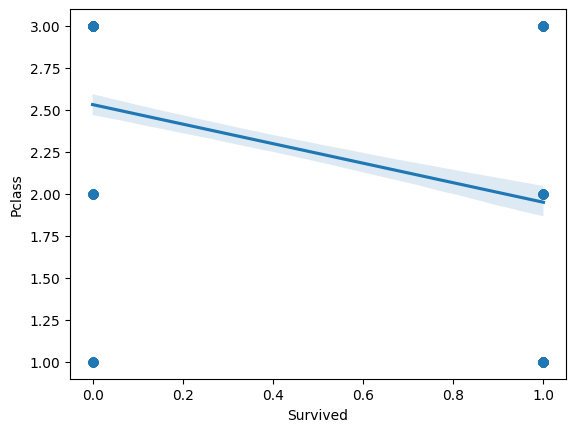

In [5]:
sns.regplot(x="Survived", y="Pclass", data=dataframe)

### Завдання №3

* побудуйте `heatmap()` для візуального відображення пропущених значень
* для кількісної змінної поповніть пропущені дані середнім значенням
* для категоріальної змінної поповніть пропущені значення значенням, яке зустрічається найчастіше

<Axes: >

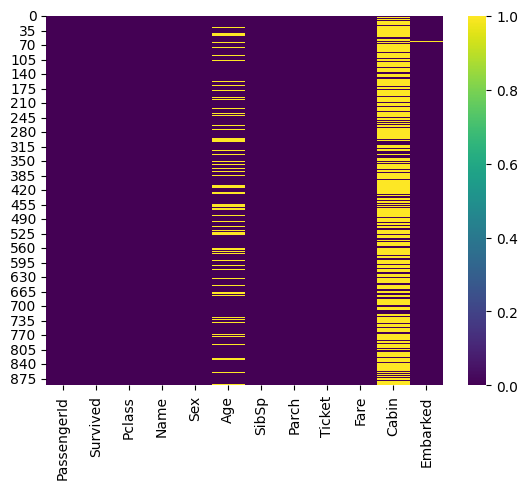

In [6]:
sns.heatmap(dataframe.isnull(), cmap='viridis')

In [7]:
avg_age=dataframe['Age'].astype('float').mean(axis=0)
avg_age

29.69911764705882

In [8]:
dataframe["Age"].replace(np.nan, avg_age, inplace=True)

In [9]:
most_common_cabin = dataframe['Cabin'].value_counts().idxmax()
most_common_cabin

'B96 B98'

In [10]:
dataframe["Cabin"].replace(np.nan, most_common_cabin, inplace=True)

In [11]:
most_common_emb = dataframe['Embarked'].value_counts().idxmax()
most_common_emb

'S'

In [12]:
dataframe["Embarked"].replace(np.nan, most_common_emb, inplace=True)

In [13]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


### Завдання №4

Оберіть 4 категоріальних змінних та закодуйте:
* Змінну_1 -  за допомогою функції `LabelEncoder()`
* Змінну_2 -  за допомогою функції `get_dummies()`
* Змінну_3 -  за допомогою функції `OneHotEncoder()`
* Змінну_4 -  кількістю значень відповідної категорії


In [14]:
le = preprocessing.LabelEncoder()
le.fit(dataframe['Sex'])
dataframe['Sex']=le.transform(dataframe['Sex'])

In [15]:
one = pd.get_dummies(dataframe[["Ticket"]])
one

,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
889,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
one_hot_encoder = preprocessing.OneHotEncoder(sparse=False) # обираємо функцію OneHotEncoder()
dataframe['Cabin']=one_hot_encoder.fit_transform(dataframe['Cabin'].values.reshape(-1,1)) # заміняємо значення стовпця на векторні значення 

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
dataframe['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
dataframe['Embarked']=dataframe['Embarked'].map(dataframe.groupby('Embarked').size())

In [19]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,646
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.0,168
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,646
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,646
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,646


### Завдання №5
Поділіть на 4 вікові групи змінну `Age`

In [20]:
est = preprocessing.KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy='quantile')
dataframe['Age_group'] = est.fit_transform(np.array(dataframe['Age']).reshape(-1,1))
dataframe[["Age", "Age_group"]]

,Age,Age_group
0,22.000000,1.0
1,38.000000,4.0
2,26.000000,1.0
3,35.000000,3.0
4,35.000000,3.0
...,...,...
886,27.000000,1.0
887,19.000000,0.0
888,29.699118,3.0
889,26.000000,1.0


### Завдання №6

* Створіть новий датафрейм з вихідного тільки із числових значень
* Застосуйте $MinMax$-Нормування даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $Standart Scaling$ даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $L_1$-Нормування та збережіть в новий датафрейм, виведіть описову статистику


In [21]:
numerical_dataframe = dataframe[["Age", "Fare"]]
numerical_dataframe.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [22]:
MMS = preprocessing.MinMaxScaler()
min_max_dataframe = MMS.fit_transform(numerical_dataframe)
min_max_dataframe = pd.DataFrame({'Age':min_max_dataframe[:,0],'Fair':min_max_dataframe[:,1]})
min_max_dataframe.describe()

,Age,Fair
count,891.000000,891.000000
mean,0.367921,0.062858
std,0.163383,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.367921,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


In [23]:
SS = preprocessing.StandardScaler()
standard_dataframe = SS.fit_transform(numerical_dataframe)
standard_dataframe = pd.DataFrame({'Age':standard_dataframe[:,0],'Fair':standard_dataframe[:,1]})
standard_dataframe.describe()

,Age,Fair
count,8.910000e+02,8.910000e+02
mean,2.232906e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.253155e+00,-6.484217e-01
25%,-5.924806e-01,-4.891482e-01
50%,0.000000e+00,-3.573909e-01
75%,4.079260e-01,-2.424635e-02
max,3.870872e+00,9.667167e+00
